In [33]:
import os
import pandas as pd
import numpy as np

In [2]:
os.getcwd()

'C:\\Users\\Marco\\Documents\\CMTH 642\\Assignment 3'

In [3]:
df=pd.read_csv("winequality-white.csv",sep=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


2. Are there a ny missing values i n the dataset? (4 p oints)


In [5]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

There are zero missing values in the dataset.

3. What is the correlation b etween the attributes other than Quality? (10 points)

In [6]:
df.iloc[0:,0:11].corr().abs()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
fixed acidity,1.000000,0.022697,0.289181,0.089021,0.023086,0.049396,0.091070,0.265331,0.425858,0.017143,0.120881
volatile acidity,0.022697,1.000000,0.149472,0.064286,0.070512,0.097012,0.089261,0.027114,0.031915,0.035728,0.067718
citric acid,0.289181,0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,0.163748,0.062331,0.075729
residual sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,0.194133,0.026664,0.450631
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,0.090439,0.016763,0.360189
free sulfur dioxide,0.049396,0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,0.000618,0.059217,0.250104
total sulfur dioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,0.448892
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,0.093591,0.074493,0.780138
pH,0.425858,0.031915,0.163748,0.194133,0.090439,0.000618,0.002321,0.093591,1.000000,0.155951,0.121432
sulphates,0.017143,0.035728,0.062331,0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,0.017433


4. Graph the frequency distribution of wine quality by using Quality. (10
points)

In [7]:
import matplotlib.pyplot as plt

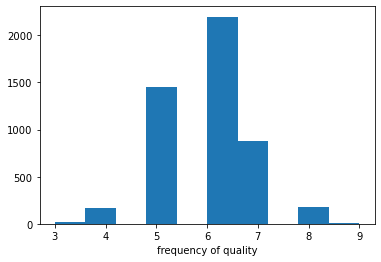

In [8]:
hist=plt.hist(df['quality'])
hist=plt.xlabel('frequency of quality')

5. Reduce the l evels of rating for quality to three levels as high, medium and
low. Assign the levels of 3 and 4 to l evel 0; 5 and 6 to level 1; and 7 ,8 a nd 9
to level 2 . (10 points)


In [9]:
df['quality'].value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

In [10]:
for i in df['quality']:
    if i<=4:
        df['quality'].replace([3,4],[0,0],inplace=True)
    elif i > 4 and i < 7:
        df['quality'].replace([5,6],[1,1],inplace=True)
    elif i >=7:
        df['quality'].replace([7,8,9],[2,2,2],inplace=True)

In [11]:
df['quality'].value_counts()    

1    3655
2    1060
0     183
Name: quality, dtype: int64

6. Normalize the numeric attributes. (12 p oints)


In [12]:
df['quality']

0       1
1       1
2       1
3       1
4       1
       ..
4893    1
4894    1
4895    1
4896    2
4897    1
Name: quality, Length: 4898, dtype: int64

In [16]:
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
dependent = standardScaler.fit_transform(dependent)

In [35]:
dependent

array([[ 1.72096961e-01, -8.17699008e-02,  2.13280202e-01, ...,
        -1.24692128e+00, -3.49184257e-01, -1.39315246e+00],
       [-6.57501128e-01,  2.15895632e-01,  4.80011213e-02, ...,
         7.40028640e-01,  1.34184656e-03, -8.24275678e-01],
       [ 1.47575110e+00,  1.74519434e-02,  5.43838363e-01, ...,
         4.75101984e-01, -4.36815783e-01, -3.36667007e-01],
       ...,
       [-4.20473102e-01, -3.79435433e-01, -1.19159198e+00, ...,
        -1.31315295e+00, -2.61552731e-01, -9.05543789e-01],
       [-1.60561323e+00,  1.16673788e-01, -2.82557040e-01, ...,
         1.00495530e+00, -9.62604939e-01,  1.85757201e+00],
       [-1.01304317e+00, -6.77100966e-01,  3.78559282e-01, ...,
         4.75101984e-01, -1.48839409e+00,  1.04489089e+00]])

7. Divide t he dataset to training and test sets. (12 points)


In [14]:
dependent = df.loc[:,df.columns != 'quality']

In [15]:
independent = df['quality']

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(dependent,independent,test_size=0.30,random_state=5)

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

In [19]:
logreg = LogisticRegression(random_state=50)
logreg.fit(x_train,y_train)

log_pred = logreg.predict(x_test)

logreg_accuracy=round(metrics.accuracy_score(y_test,log_pred)*100,2)
logreg_accuracy

78.03

In [20]:
print(metrics.classification_report(y_test,log_pred))
print(confusion_matrix(y_test,log_pred))

              precision    recall  f1-score   support

           0       0.33      0.02      0.04        53
           1       0.81      0.93      0.87      1131
           2       0.54      0.34      0.42       286

    accuracy                           0.78      1470
   macro avg       0.56      0.43      0.44      1470
weighted avg       0.74      0.78      0.75      1470

[[   1   51    1]
 [   2 1048   81]
 [   0  188   98]]


8. Use t he KNN algorithm to p redict the quality o f w ine using its attributes.
(12 p oints)


In [21]:
classifier = KNeighborsClassifier(n_neighbors=5) 
classifier.fit(x_train, y_train)

knn_pred=classifier.predict(x_test)

logreg_accuracy=round(metrics.accuracy_score(y_test,log_pred)*100,2)
logreg_accuracy

78.03

9. Display the confusion matrix to e valuate the model performance. (12
points)


In [22]:
print(metrics.classification_report(y_test,knn_pred))
print(confusion_matrix(y_test,knn_pred))

              precision    recall  f1-score   support

           0       0.31      0.09      0.14        53
           1       0.85      0.88      0.87      1131
           2       0.55      0.54      0.54       286

    accuracy                           0.79      1470
   macro avg       0.57      0.51      0.52      1470
weighted avg       0.77      0.79      0.78      1470

[[  5  46   2]
 [  9 998 124]
 [  2 130 154]]


10. Evaluate the model performance by computing Accuracy, Sensitivity and Specificity. (15 points)

In [23]:
print("the accuracy fot the KNN model is",logreg_accuracy)

the accuracy fot the KNN model is 78.03


In [24]:
cm = confusion_matrix(y_test,knn_pred)
cm

array([[  5,  46,   2],
       [  9, 998, 124],
       [  2, 130, 154]], dtype=int64)

In [26]:
A=cm[0,0]
AB=cm[0,1]
AC=cm[0,2]
BA=cm[1,0]
B=cm[1,1]
BC=cm[1,2]
CA=cm[2,0]
CB=cm[2,1]
C=cm[2,2]

In [27]:
sensitivity_A=A/(A+AB+AC)
sensitivity_B=B/(B+BA+BC)
sensitivity_C=C/(C+CA+CB)

print("sensitivity for A:",sensitivity_A*100,"\n",
     "sensitivity for B:",sensitivity_B*100,"\n",
     "sensitivity for C:",sensitivity_C*100)

sensitivity for A: 9.433962264150944 
 sensitivity for B: 88.24049513704686 
 sensitivity for C: 53.84615384615385


In [29]:
specificity_A=B+BC+CB+C/(B+BC+CB+C+BA+CA)
specificity_B=A+AC+CA+C/(A+AC+CA+C+AB+CB)
specificity_C=A+AB+BA+B/(A+AB+BA+B+BC+AC)

print("specificity for A:",specificity_A,"\n",
     "specificity for B:",specificity_B,"\n",
     "specificity for C:",specificity_C)

specificity for A: 1252.1086803105152 
 specificity for B: 9.454277286135694 
 specificity for C: 60.8429054054054
